# Exploratory Data Analysis (EDA)

In this notebook, we explore the raw electricity load dataset to understand its structure, distributions, correlations, and potential issues such as outliers or missing values. This helps inform which features may be useful for our baseline and later models.

In [4]:
import pandas as pd

df = pd.read_csv("../data/electricity.csv")
df.head()

,id_series,date,value_0,value_1,value_2,value_3,value_4,value_5,value_6,value_7,...,value_307,value_308,value_309,value_310,value_311,value_312,value_313,value_314,value_315,time_step
0,0,2012-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0,2012-01-01 00:15:00,3.807107,22.759602,77.324066,136.178862,70.731707,351.190476,9.609949,279.461279,...,128.479657,28500.0,1729.957806,1704.545455,15.645372,12.873025,504.828797,63.439065,761.730205,1
2,0,2012-01-01 00:30:00,5.076142,22.759602,77.324066,136.178862,73.170732,354.166667,9.044658,279.461279,...,127.765882,26400.0,1654.008439,1659.090909,15.645372,13.458163,525.021949,60.100167,702.346041,2
3,0,2012-01-01 00:45:00,3.807107,22.759602,77.324066,140.243902,69.512195,348.214286,8.479367,279.461279,...,114.204140,25200.0,1333.333333,1636.363636,15.645372,10.532475,526.777875,56.761269,696.480938,3
4,0,2012-01-01 01:00:00,3.807107,22.759602,77.324066,140.243902,75.609756,339.285714,7.348785,279.461279,...,112.062812,23800.0,1324.894515,1636.363636,15.645372,14.628438,539.947322,63.439065,693.548387,4


## Dataset Overview

The dataset contains 105,217 rows and 319 columns.  
Most columns are continuous sensor measurements (value_0 to value_315), along with:
- id_series: identifies the time series source  
- date: timestamp  
- time_step: sequence index  

### Key observations:
- Nearly all features are numerical and high-dimensional (316+ features).
- Many columns contain long stretches of zeros, indicating sparse patterns.
- The dataset size is large but manageable, requiring efficient preprocessing.

## Initial dataset inspection

First, we load the CSV file and inspect its structure using `head()` and `info()` to understand the columns, data types, and size of the dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105217 entries, 0 to 105216
Columns: 319 entries, id_series to time_step
dtypes: float64(316), int64(2), object(1)
memory usage: 256.1+ MB


## Summary statistics

To understand the range and distribution of each variable, I generate descriptive statistics. With 300+ features, this helps identify which columns show higher variance or potential outliers.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id_series,105217.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
value_0,105217.0,5.293122,6.382257,0.0,1.269036,2.538071,5.076142,48.223350
value_1,105217.0,27.684728,6.583655,0.0,23.470839,27.738265,32.005690,115.220484
value_2,105217.0,3.890152,12.567376,0.0,1.737619,1.737619,2.606429,151.172893
value_3,105217.0,109.553284,39.043562,0.0,83.333333,99.593496,128.048780,321.138211
...,...,...,...,...,...,...,...,...
value_312,105217.0,12.356675,9.777768,0.0,5.851375,8.777063,14.043300,60.269163
value_313,105217.0,565.549464,142.894740,0.0,492.537313,579.455663,654.960492,1138.718174
value_314,105217.0,126.242954,67.921538,0.0,58.430718,123.539232,175.292154,362.270451
value_315,105217.0,833.470895,140.024961,0.0,728.005865,816.715543,909.824047,1549.120235


## Distribution Observations

The summary statistics show:
- Many features have min = 0 and median close to 0, which suggests:
    - strong right skew  
    - many zero-valued observations  
- Some features have extremely large maximum values compared to their mean, indicating presence of outliers.
- Variance differs significantly across features, so normalization or scaling may be necessary.
These patterns confirm that naive models may struggle with raw, unscaled inputs.

## Distribution of Features

To understand how each variable is distributed, we plot histograms for all features.  
This helps us identify skewness, outliers, and unusual patterns that might affect modeling.

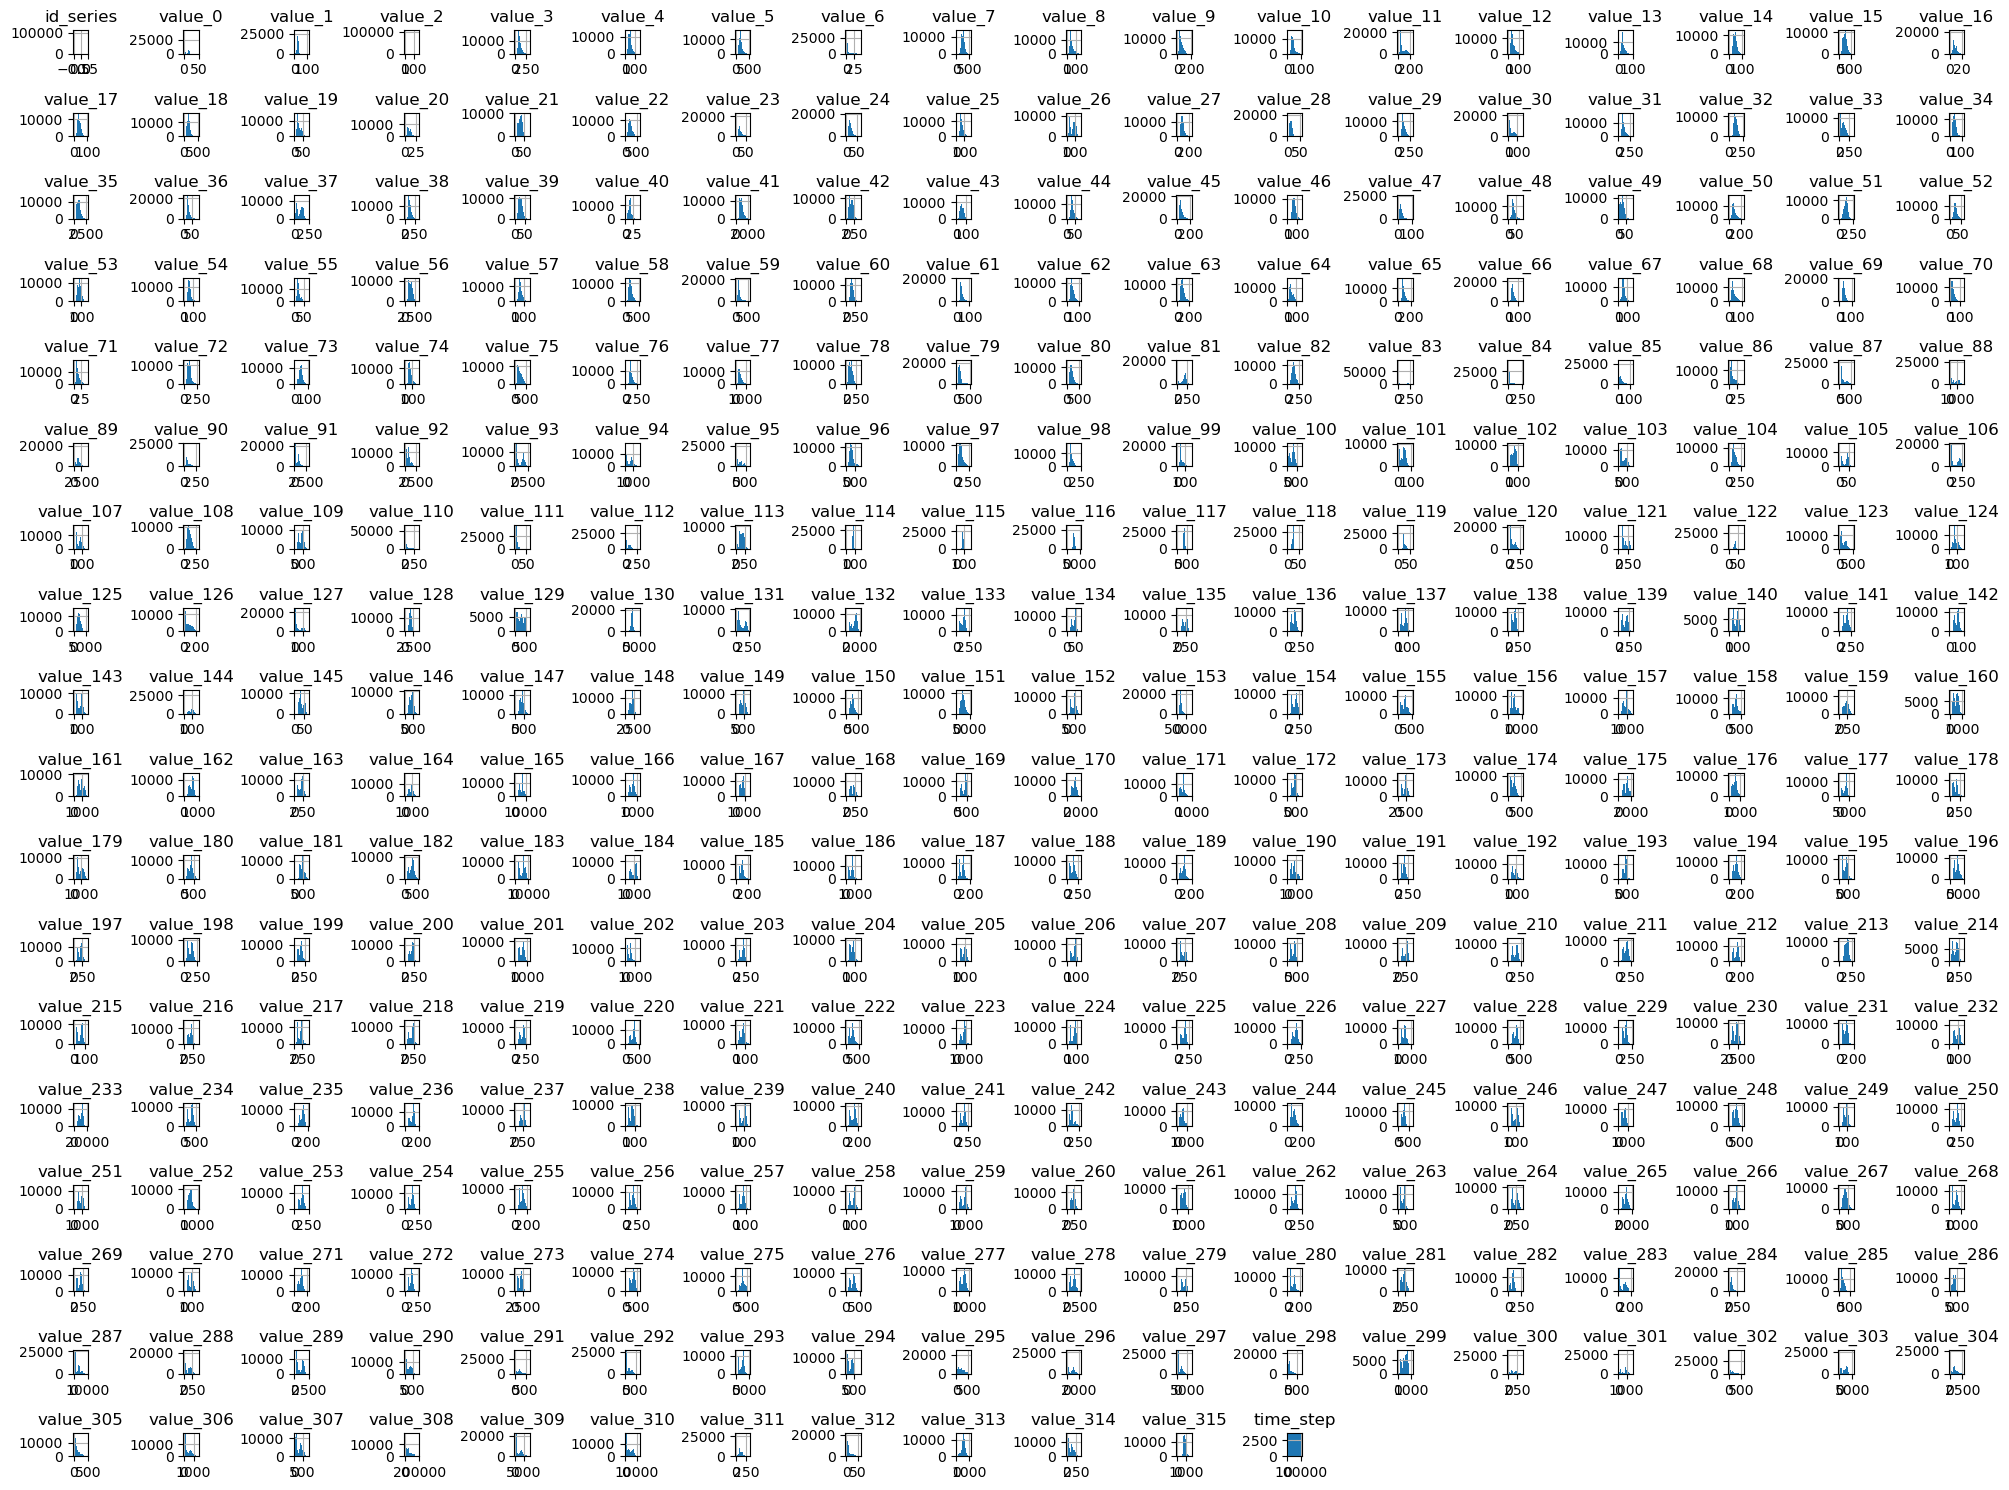

In [7]:
import matplotlib.pyplot as plt

df.hist(figsize=(20, 15), bins=30)
plt.tight_layout()
plt.show()

## Correlation Analysis

Next, we compute correlations between each feature and the target variable (`value_0`).  
This shows which features are most strongly related to the target and may be useful for predictive modeling.  
We also generate a pairplot for a small set of features to visually inspect their relationships.

In [8]:
target = "value_0"
corr_with_target = df.corr(numeric_only=True)[target].sort_values(ascending=False)
corr_with_target


value_0      1.000000
value_47     0.214051
value_116    0.161823
value_120    0.160507
value_267    0.132182
               ...   
value_28    -0.096997
value_242   -0.100025
value_137   -0.111542
value_21    -0.179625
id_series         NaN
Name: value_0, Length: 318, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Feature/target split
X = df.drop(columns=["value_0"])
y = df["value_0"]

# Time-series split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

train_with_target = X_train.copy()
train_with_target["value_0"] = y_train.values

# Correlation
corr_train = (
    train_with_target
    .corr(numeric_only=True)["value_0"]
    .sort_values(ascending=False)
)

corr_train.head(10)


value_0      1.000000
value_47     0.216893
value_120    0.198488
value_99     0.172738
value_167    0.147862
value_127    0.147824
value_267    0.144463
value_124    0.136253
value_116    0.132888
value_129    0.132364
Name: value_0, dtype: float64

In [13]:
strong_corr = corr_with_target[ corr_with_target > 0.99 ]
strong_corr

value_0    1.0
Name: value_0, dtype: float64

### Correlation Findings

- Correlations with value_0 are generally low (< 0.3).
- Only a few sensor channels show moderate correlation.
- This indicates that relationships are nonlinear.
- Linear regression may struggle without feature engineering.

This motivates the use of tree-based models and dimensionality reduction.

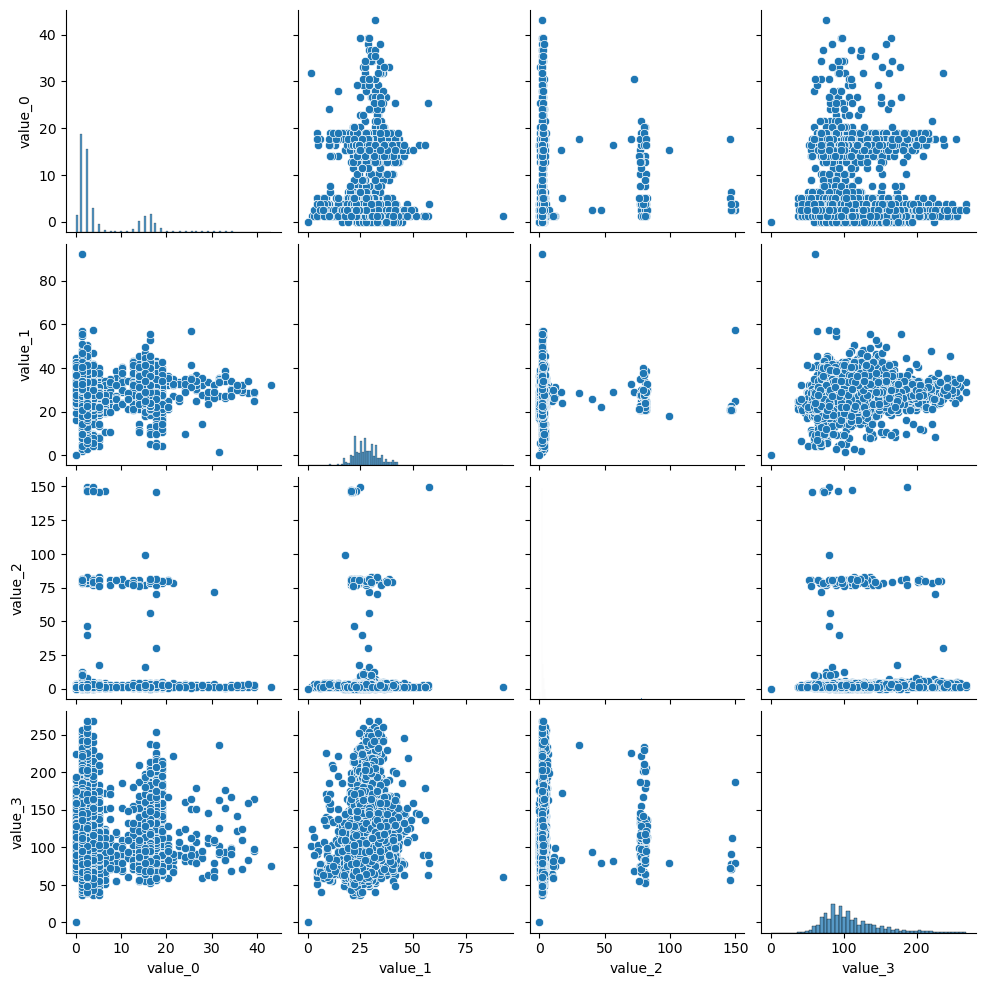

In [14]:
import seaborn as sns

cols = ["value_0", "value_1", "value_2", "value_3"]
sns.pairplot(df[cols].sample(5000))  # sample because dataset is large
plt.show()

## Pairwise Visualization Insights

Pairplots of selected features show:

- Curved, nonlinear relationships  
- Several clusters  
- Large variance differences  
- Sparse patterns  

These visual insights support using nonlinear models and dimensionality reduction methods.

# EDA Conclusions and Next Steps

### Key Insights:
- The dataset is high-dimensional (319 features).
- Features are skewed, sparse, and contain outliers.
- Time-based patterns likely play an important role.
- Correlations with the target are weak → nonlinear modeling needed.

### Implications:
- Dimensionality reduction (SRP) will be needed.
- Normalization is necessary for sensitive models.
- Baseline models will perform poorly (as expected).
- Gradient Boosting and nonlinear approaches will be better choices.

This EDA sets the foundation for preprocessing, modeling, and improvement steps.